In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from ipywidgets import interact, Button
import ipywidgets as widgets
import scipy.ndimage as ndimage
import xarray

In [2]:
sys.path.insert(1, os.path.abspath(os.path.join(os.path.join(os.path.abspath(""), os.pardir), os.pardir)))
import neurotorch as neuro
neuro.Start_Background()
%matplotlib inline  

In [ ]:
xDiffImg = xarray.DataArray(np.clip(neuro.API_IMG().imgDiff, a_min=0, a_max=None).astype("uint16"), name="diffImg", dims=("pln", "row", "col"))
print(xDiffImg)
javaDiffImg = neuro.API_IJ().py.to_java(xDiffImg)

In [ ]:
dump_info(javaDiffImg)

In [26]:
from scyjava import jimport
IP = jimport('ij.ImagePlus')

In [28]:
op = neuro.API_IJ().op()

In [31]:
ui = neuro.API_IJ().ui()

In [38]:
ui.show(javaDiffImg)

In [41]:
ij = neuro.API_IJ()

In [ ]:
ij.py.run_macro("setMinAndMax(0, 1);")

In [ ]:
imgXA = neuro.API_IJ().py.active_xarray()
print(imgXA)

In [ ]:
neuro.API_IJ().py.to_java(imgXA)

In [ ]:
neuro.API_IJ().py.to_java(xDiffImg)

In [ ]:
neuro.API_IJ().py.to_java(imgXA)

In [39]:
imagePlusDiffImg.show()

In [43]:
wm = neuro.API_IJ().WindowManager

In [22]:
import skimage
import xarray

def dump_info(image):
    """A handy function to print details of an image object."""
    name = image.name if hasattr(image, 'name') else None # xarray
    if name is None and hasattr(image, 'getName'): name = image.getName() # Dataset
    if name is None and hasattr(image, 'getTitle'): name = image.getTitle() # ImagePlus
    print(f" name: {name or 'N/A'}")
    print(f" type: {type(image)}")
    print(f"dtype: {image.dtype if hasattr(image, 'dtype') else 'N/A'}")
    print(f"shape: {image.shape}")
    print(f" dims: {image.dims if hasattr(image, 'dims') else 'N/A'}")



In [14]:
def _Circle_FullMask2(point, radius: int) -> np.ndarray:
    x = np.arange(0, 20)
    y = np.arange(0, 20)
    mask = np.array((x[np.newaxis,:] - point[0])**2 + (y[:,np.newaxis] - point[1])**2 <= radius**2, dtype="uint8")[0]
    n = np.count_nonzero(mask==1)
    return (mask, n)

def _Circle_FullMask(point, radius: int) -> np.ndarray:
        x = np.arange(0, neuro.API_IMG().imgDiff.shape[2])
        y = np.arange(0, neuro.API_IMG().imgDiff.shape[1])
        mask = np.array((x[np.newaxis,:] - point[0])**2 + (y[:,np.newaxis] - point[1])**2 <= radius**2, dtype="uint8")
        n = np.count_nonzero(mask==1)
        return (mask, n)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

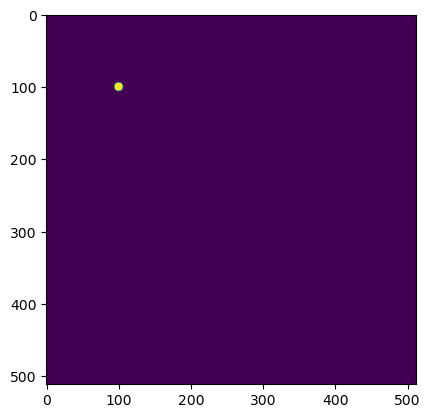

In [16]:
mask, n = _Circle_FullMask((100,100), 6)
print(mask[100])
plt.imshow(mask)

(300, 12, 12)


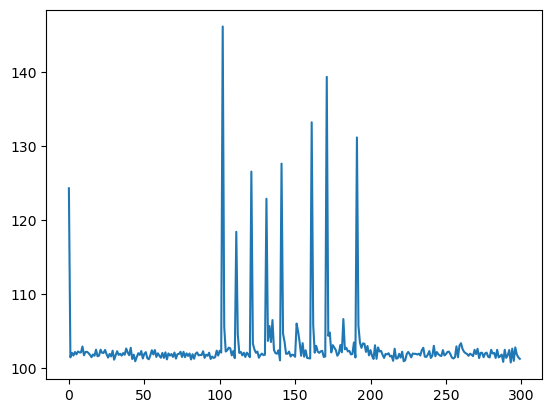

In [38]:
bbox = neuro.API_IMG().img[:, 130:142, 230:242]
print(bbox.shape)
plt.plot(np.mean(bbox, axis=(1,2)))

In [54]:
test = [bbox[0:5,x,y] for x, y in np.ndindex((12+1,12+1)) if (x**2+y**2)<6**2]
#test = [(x,y) for x, y in np.ndindex((12+1,12+1)) if ((x-6)**2+(y-6)**2)<=6**2]
print(test)

[array([65, 54, 54, 54, 54], dtype=int16), array([71, 59, 60, 59, 60], dtype=int16), array([85, 70, 72, 71, 73], dtype=int16), array([95, 77, 79, 77, 79], dtype=int16), array([104,  80,  82,  80,  82], dtype=int16), array([106,  78,  81,  79,  80], dtype=int16), array([69, 55, 56, 55, 57], dtype=int16), array([75, 61, 62, 61, 63], dtype=int16), array([101,  82,  84,  83,  86], dtype=int16), array([117,  94,  97,  95,  99], dtype=int16), array([119,  92,  95,  92,  96], dtype=int16), array([124,  92,  95,  92,  95], dtype=int16), array([89, 72, 73, 72, 74], dtype=int16), array([101,  83,  85,  84,  86], dtype=int16), array([119,  95,  98,  96,  99], dtype=int16), array([122,  99, 101, 100, 102], dtype=int16), array([130, 102, 104, 102, 105], dtype=int16), array([131, 101, 102, 100, 103], dtype=int16), array([110,  87,  89,  87,  91], dtype=int16), array([122, 102, 104, 102, 106], dtype=int16), array([132, 105, 108, 107, 109], dtype=int16), array([138, 111, 113, 113, 115], dtype=int16), 

In [45]:
def AdvImgCircle(point, radius):
    xmax = neuro.API_IMG().img.shape[2]
    ymax = neuro.API_IMG().img.shape[1]
    #bbox = neuro.API_IMG().img[:, max(0, point[1]-radius):min(ymax, point[1]+radius),max(0, point[0]-radius):min(xmax, point[0]+radius)]
    #print(bbox.shape)
    return np.array([neuro.API_IMG().img[:,y,x] 
                     for x in range(point[0]-radius,point[0]+2*radius+1) for y in range(point[1]-radius,point[1]+2*radius+1)
                     if ((x-point[0])**2+(y-point[1])**2)<=radius**2 and x >= 0 and y >= 0 and x < xmax and y < ymax]).T

[[146 199]
 [146 200]
 [146 201]
 [147 198]
 [147 199]
 [147 200]
 [147 201]
 [147 202]
 [148 197]
 [148 198]
 [148 199]
 [148 200]
 [148 201]
 [148 202]
 [148 203]
 [149 196]
 [149 197]
 [149 198]
 [149 199]
 [149 200]
 [149 201]
 [149 202]
 [149 203]
 [149 204]
 [150 196]
 [150 197]
 [150 198]
 [150 199]
 [150 200]
 [150 201]
 [150 202]
 [150 203]
 [150 204]
 [151 196]
 [151 197]
 [151 198]
 [151 199]
 [151 200]
 [151 201]
 [151 202]
 [151 203]
 [151 204]
 [152 197]
 [152 198]
 [152 199]
 [152 200]
 [152 201]
 [152 202]
 [152 203]
 [153 198]
 [153 199]
 [153 200]
 [153 201]
 [153 202]
 [154 199]
 [154 200]
 [154 201]]


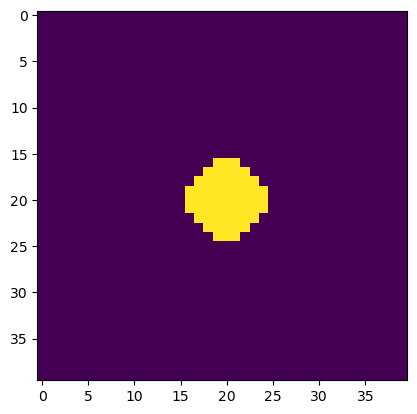

In [48]:
point = (150,200)
radius = 4
xmax = 512
ymax = 512
test = np.array([(x,y) for x in range(point[0]-radius,point[0]+2*radius+1) for y in range(point[1]-radius,point[1]+2*radius+1)
                     if ((x-point[0])**2+(y-point[1])**2)<radius**2+2**(1/2) and x >= 0 and y >= 0 and x < xmax and y < ymax])
print(test)
dis = np.empty(shape=(512,512))
for t in test:
    dis[t[0],t[1]] = 1
plt.imshow(dis[130:170, 180:220])
plt.show()

In [13]:
print(AdvImgCircle((100,100),6))

[[ 8 10  9 ... 21 17 14]
 [ 8 11 10 ... 20 16 14]
 [ 8  8  9 ... 19 16 13]
 ...
 [ 8  9  9 ... 20 17 14]
 [ 8  9  9 ... 19 16 13]
 [ 8  9  9 ... 19 16 13]]


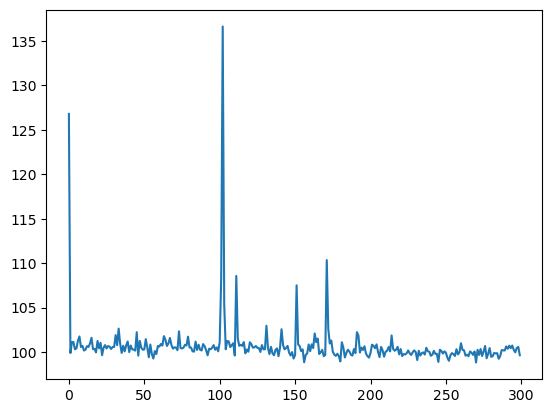

In [50]:
mean = np.mean(AdvImgCircle((439,158),6), axis=1)
#print(mean)
plt.plot(mean)
plt.show()

In [8]:
np.mean(neuro.API_IMG().GetImgROIAt((100,100), 6), axis=0).shape

(300,)

## Connecting to Trace_Selector

In [1]:
import sys, os
sys.path.insert(1, os.path.abspath(os.path.join(os.path.join(os.path.abspath(""), os.pardir), os.pardir)))
import neurotorch as neuro
neuro.Start_Background()
%matplotlib inline  

In [3]:
print(neuro.settings.UserSettings.ParentPath)

d:\Eigene Datein\Programmieren\Git\abrilka\neurotorch\neurotorch


In [2]:
from trace_selector.gui.gui import MainWindow
from trace_selector.utils.configuration import gui_settings
from trace_selector.detection.model_zoo import ModelZoo
from PyQt6.QtWidgets import QApplication
import sys
import os
import multiprocessing
import tkinter as tk
from tkinter import messagebox

def Show():
    messagebox.showinfo("Hello World")
    return
    modelzoo_folder = os.path.join(*["d:\\Eigene Datein\\Programmieren\\Git\\abrilka\\neurotorch\\neurotorch", "external", "synapse_selector_modelzoo"])
    modelzoo = ModelZoo(modelzoo_folder)
    settings = gui_settings(modelzoo)
    app = QApplication(sys.argv)
    main = MainWindow(settings)
    main.show()
    app.exec()

class _TraceSelector():

    def __init__(self):
        #import neurotorch.gui.settings as settings
        #self.modelzoo_folder = os.path.join(*[settings.UserSettings.ParentPath, "external", "synapse_selector_modelzoo"])
        self.modelzoo_folder = os.path.join(*["d:\\Eigene Datein\\Programmieren\\Git\\abrilka\\neurotorch\\neurotorch", "external", "synapse_selector_modelzoo"])
        self.modelzoo, self.settings, self.app, self.main, self.proc = None, None, None, None, None

    def _Show(self):
        modelzoo = ModelZoo(self.modelzoo_folder)
        settings = gui_settings(modelzoo)
        app = QApplication(sys.argv)
        main = MainWindow(settings)
        main.show()
        app.exec()

    def Show(self):
        self.proc = multiprocessing.Process(target=self._Show, args=()) 
        self.proc.start()

TraceSelector = _TraceSelector()

In [4]:
TraceSelector.Show()

In [14]:
proc = multiprocessing.Process(target=Show, args=()) 
proc.start()
print(proc)

<Process name='Process-8' pid=41856 parent=44712 started>


In [4]:
def Test():
    print("Hello World")
    sys.stdout.flush()

proc = multiprocessing.Process(target=Test, args=()) 
proc.start()